# Linear Regression

A group of experiments demonstrating linear regression using ***nerve*** based neural networks.

In [1]:
import nerve
import numpy as np
import matplotlib.pyplot as plt

## Simple Linear Regression

The input data. The parameters expected from the model are: **[2.5, 0.3]**

In [2]:
X = np.array(list(range(20))).reshape(20, 1)
X = nerve.utils.scale(X)
y = X * 2.5 + 0.3

num_data_points = 4
print('Examples of the data points')
print(("Input    " + "{:.3f}  " * num_data_points).format(*X[:num_data_points].T[0]))
print(("Expected " + "{:.3f}  " * num_data_points).format(*y[:num_data_points].T[0]))

Examples of the data points
Input    0.000  0.053  0.105  0.158  
Expected 0.300  0.432  0.563  0.695  


Creating a network

In [3]:
network = nerve.Network(
    layers=[
        nerve.layers.Input(1),
        nerve.layers.Dense(1, bias=True),
    ]
)
print(network)

[1]Input(1)
[2]Dense(1)


The network is initialized with random parameters

In [4]:
# TODO: Fix get params print.
network.get_params()

[1]Input []
[2]Dense(1) {'_freeze': False, 'weights': array([[0.85731883, 0.58668639]])}


Enter training preferences into the network

In [5]:
loss = nerve.loss.mse
optimizer = nerve.optimizers.GradientDescentOptimizer(0.01)
network.prepare(loss, optimizer, epochs=1000)

Preprocess data and train the network

CPU times: user 163 ms, sys: 6.22 ms, total: 169 ms
Wall time: 199 ms


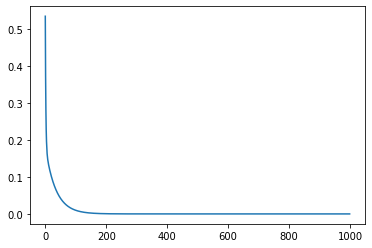

In [6]:
%%time
losses = network.train(X=X, y=y)
plt.plot(losses)

Trained Model Params

In [7]:
network.get_params()

[1]Input []
[2]Dense(1) {'_freeze': False, 'weights': array([[2.49999937, 0.30000034]])}


Making a prediction

In [8]:
inp = X[2]
out = network(X[2].reshape(1,1))
print(f'Inp: {inp}, Out: {out}')

Inp: [0.10526316], Out: [[0.56315817]]


#### Result

It can be seen that it the model was well trained at about 200 epochs, for 1000 epochs it took < 200 ms (not bad for pure python right?) and we have correctly predicted the network parameters:
**[2.499, 0.300]**

### Experiment 1 - What happens with relu activation at the end?

Network Parameteres:
[3]Input []
[4]Dense(1) {'_freeze': False, 'weights': array([[-0.17312978, -0.11426593]])}
[5]Relu []


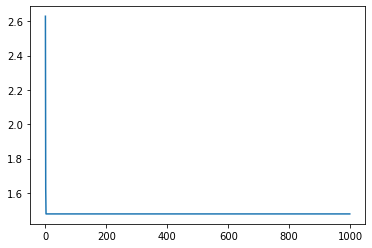

In [9]:
X = np.array(list(range(20))).reshape(20, 1)
X = nerve.utils.scale(X)
y = X * -2.5 + 0.3

network = nerve.Network(
    layers=[
        nerve.layers.Input(1),
        nerve.layers.Dense(1, bias=True),
        nerve.layers.Relu()   # Comment and re-run
    ]
)

loss = nerve.loss.mse
optimizer = nerve.optimizers.GradientDescentOptimizer(0.01)
network.prepare(loss, optimizer, 1000)

losses = network.train(X=X, y=y)
plt.plot(losses)

print("Network Parameteres:")
network.get_params()

#### Result

We are still able to predict well. Here we have used a -2.5 constant to challenge the Relu layer. And as expected it is not able to train very well. Once the Relu() layer is removed we get our desired result.